# Time series in pandas

## 1. Creating and using a DatetimeIndex
The pandas Index is a powerful way to handle time series data, so it is valuable to know how to build one yourself. Pandas provides the pd.to_datetime() function for just this task. For example, if passed the list of strings ['2015-01-01 091234','2015-01-01 091234'] and a format specification variable, such as format='%Y-%m-%d %H%M%S, pandas will parse the string into the proper datetime elements and build the datetime objects.

In this exercise, a list of temperature data and a list of date strings has been pre-loaded for you as temperature_list and date_list respectively. Your job is to use the .to_datetime() method to build a DatetimeIndex out of the list of date strings, and to then use it along with the list of temperature data to build a pandas Series.

In [1]:
# Importing required packages
import pandas as pd

In [14]:
# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)  
my_datetimes

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               ...
               '2010-02-11 06:00:00', '2010-02-11 07:00:00',
               '2010-02-11 08:00:00', '2010-02-11 09:00:00',
               '2010-02-11 10:00:00', '2010-02-11 11:00:00',
               '2010-02-11 12:00:00', '2010-02-11 13:00:00',
               '2010-02-11 14:00:00', '2010-02-11 15:00:00'],
              dtype='datetime64[ns]', length=1000, freq=None)

In [12]:
# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(temperature_list, index=my_datetimes)
time_series.tail()

2010-02-11 11:00:00    55.7
2010-02-11 12:00:00    58.0
2010-02-11 13:00:00    60.0
2010-02-11 14:00:00    61.4
2010-02-11 15:00:00    62.3
dtype: float64

Awesome job! Next to DataFrames, Series are another important object that pandas allows us to create, and they're very convenient for time series data

## 2. Partial string indexing and slicing
Pandas time series support "partial string" indexing. What this means is that even when passed only a portion of the datetime, such as the date but not the time, pandas is remarkably good at doing what one would expect. Pandas datetime indexing also supports a wide variety of commonly used datetime string formats, even when mixed.

In this exercise, a time series that contains hourly weather data has been pre-loaded for you. This data was read using the parse_dates=True option in read_csv() with index_col="Dates" so that the Index is indeed a DatetimeIndex.

Extract all data from the 'Temperature' column into the variable ts0. Your job is to use a variety of natural date strings to extract one or more values from ts0.

After you are done, you will have three new variables - ts1, ts2, and ts3. You can slice these further to extract only the first and last entries of each. Try doing this after your submission for more practice.

In [17]:
# Import in weather data
ts0 = pd.read_csv("datasets/weather_data_austin_2010.csv", parse_dates= True, index_col = "Date")
ts0.tail()

,Temperature,DewPoint,Pressure
Date,,,
2010-12-31 19:00:00,51.1,38.1,1.0
2010-12-31 20:00:00,49.0,37.9,1.0
2010-12-31 21:00:00,47.9,37.9,1.0
2010-12-31 22:00:00,46.9,37.9,1.0
2010-12-31 23:00:00,46.2,37.7,1.0


In [27]:
# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = ts0.loc['2010-10-11 21:00:00':'2010-10-11 22:00:00']
ts1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2 entries, 2010-10-11 21:00:00 to 2010-10-11 22:00:00
Data columns (total 3 columns):
Temperature    2 non-null float64
DewPoint       2 non-null float64
Pressure       2 non-null float64
dtypes: float64(3)
memory usage: 64.0 bytes


In [26]:
# Extract '2010-07-04' from ts0: ts2
ts2 = ts0.loc['2010-07-04']
ts2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2010-07-04 00:00:00 to 2010-07-04 23:00:00
Data columns (total 3 columns):
Temperature    24 non-null float64
DewPoint       24 non-null float64
Pressure       24 non-null float64
dtypes: float64(3)
memory usage: 768.0 bytes


In [25]:
# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = ts0.loc['2010-12-15':'2010-12-31']
ts3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 408 entries, 2010-12-15 00:00:00 to 2010-12-31 23:00:00
Data columns (total 3 columns):
Temperature    408 non-null float64
DewPoint       408 non-null float64
Pressure       408 non-null float64
dtypes: float64(3)
memory usage: 12.8 KB


## 3. Reindexing the Index
Reindexing is useful in preparation for adding or otherwise combining two time series data sets. To reindex the data, we provide a new index and ask pandas to try and match the old data to the new index. If data is unavailable for one of the new index dates or times, you must tell pandas how to fill it in. Otherwise, pandas will fill with NaN by default.

In this exercise, load the two time series data sets containing daily data, each indexed by dates. The first, ts1, includes weekends, but the second, ts2, does not. The goal is to combine the two data sets in a sensible way. Your job is to reindex the second data set so that it has weekends as well, and then add it to the first. When you are done, it would be informative to inspect your results.

In [30]:
# Reindex without fill method: ts3
ts3 = ts2.reindex(ts1.index)
ts3

,Temperature,DewPoint,Pressure
Date,,,
2010-10-11 21:00:00,NaN,NaN,NaN
2010-10-11 22:00:00,NaN,NaN,NaN


In [29]:
# Reindex with fill method, using forward fill: ts4
ts4 = ts2.reindex(ts1.index, method='ffill')
ts4

,Temperature,DewPoint,Pressure
Date,,,
2010-10-11 21:00:00,78.5,70.9,1.0
2010-10-11 22:00:00,78.5,70.9,1.0


In [38]:
# Combine ts1 + ts2: sum12
sum12 = ts1+ts2
sum12.tail()

,Temperature,DewPoint,Pressure
Date,,,
2010-07-04 21:00:00,NaN,NaN,NaN
2010-07-04 22:00:00,NaN,NaN,NaN
2010-07-04 23:00:00,NaN,NaN,NaN
2010-10-11 21:00:00,NaN,NaN,NaN
2010-10-11 22:00:00,NaN,NaN,NaN


In [37]:
# Combine ts1 + ts3: sum13
sum13 = ts1+ts3
sum13

,Temperature,DewPoint,Pressure
Date,,,
2010-10-11 21:00:00,NaN,NaN,NaN
2010-10-11 22:00:00,NaN,NaN,NaN


In [36]:
# Combine ts1 + ts4: sum14
sum14 = ts1+ts4
sum14

,Temperature,DewPoint,Pressure
Date,,,
2010-10-11 21:00:00,147.5,130.7,2.0
2010-10-11 22:00:00,146.2,130.8,2.0


Wonderful work! Understanding how indexing and reindexing works is a valuable skill.

## 4. Resampling and frequency
Pandas provides methods for resampling time series data. When downsampling or upsampling, the syntax is similar, but the methods called are different. Both use the concept of 'method chaining' - df.method1().method2().method3() - to direct the output from one method call to the input of the next, and so on, as a sequence of operations, one feeding into the next.

For example, if you have hourly data, and just need daily data, pandas will not guess how to throw out the 23 of 24 points. You must specify this in the method. One approach, for instance, could be to take the mean, as in df.resample('D').mean().

In this exercise, load the data set containing hourly temperature data. Your job is to resample the data using a variety of aggregation methods to answer a few questions.

In [40]:
# Copying ts0 to df dataframe
df = ts0.copy()

In [60]:
# Downsample to 6 hour data and aggregate by mean: df1
df1 = df['Temperature'].resample('6h').mean()
df1.tail()

Date
2010-12-30 18:00:00    49.150000
2010-12-31 00:00:00    44.133333
2010-12-31 06:00:00    45.916667
2010-12-31 12:00:00    57.500000
2010-12-31 18:00:00    49.233333
Freq: 6H, Name: Temperature, dtype: float64

In [61]:
# Downsample to daily data and count the number of data points: df2
df2 = df['Temperature'].resample('D').count()
df2.tail()

Date
2010-12-27    24
2010-12-28    24
2010-12-29    24
2010-12-30    24
2010-12-31    24
Freq: D, Name: Temperature, dtype: int64

Excellent job! You'll get a lot more practice with resampling in the coming exercises!

## 5. Separating and resampling
With pandas, you can resample in different ways on different subsets of your data. For example, resampling different months of data with different aggregations. In this exercise, the data set containing hourly temperature data from the last exercise has been pre-loaded.

Your job is to resample the data using a variety of aggregation methods.  You will be working with the 'Temperature' column.

In [58]:
# Extract temperature data for August: august
august = df['Temperature']['2010-08']
august.tail()

Date
2010-08-31 19:00:00    86.6
2010-08-31 20:00:00    83.4
2010-08-31 21:00:00    81.2
2010-08-31 22:00:00    79.7
2010-08-31 23:00:00    78.2
Name: Temperature, dtype: float64

In [57]:
# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample('D').max()
august_highs.tail()

Date
2010-08-27    93.7
2010-08-28    93.5
2010-08-29    93.3
2010-08-30    93.3
2010-08-31    93.1
Freq: D, Name: Temperature, dtype: float64

In [56]:
# Extract temperature data for February: february
february = df['Temperature']['2010-02']
february.tail()

Date
2010-02-28 19:00:00    60.9
2010-02-28 20:00:00    58.2
2010-02-28 21:00:00    56.4
2010-02-28 22:00:00    54.9
2010-02-28 23:00:00    53.6
Name: Temperature, dtype: float64

In [55]:
# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample('D').min()
february_lows.tail()

Date
2010-02-24    48.1
2010-02-25    48.4
2010-02-26    48.5
2010-02-27    48.6
2010-02-28    48.6
Freq: D, Name: Temperature, dtype: float64

## 6. Rolling mean and frequency
In this exercise, some hourly weather data is pre-loaded for you. You will continue to practice resampling, this time using rolling means.

Rolling means (or moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends. You can read more about them [here](https://en.wikipedia.org/wiki/Moving_average).

To use the .rolling() method, you must always use method chaining, first calling .rolling() and then chaining an aggregation method after it. For example, with a Series hourly_data, hourly_data.rolling(window=24).mean() would compute new values for each hourly point, based on a 24-hour window stretching out behind each point. The frequency of the output data is the same: it is still hourly. Such an operation is useful for smoothing time series data.

Your job is to resample the data using the combination of .rolling() and .mean(). 

In [67]:
# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = df['Temperature']['2010-Aug-01':'2010-Aug-15']

In [68]:
# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window = 24).mean()

In [69]:
# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})
august.tail()

,smoothed,unsmoothed
Date,,
2010-08-15 19:00:00,84.179167,88.8
2010-08-15 20:00:00,84.175000,85.5
2010-08-15 21:00:00,84.175000,83.3
2010-08-15 22:00:00,84.175000,81.6
2010-08-15 23:00:00,84.170833,80.0


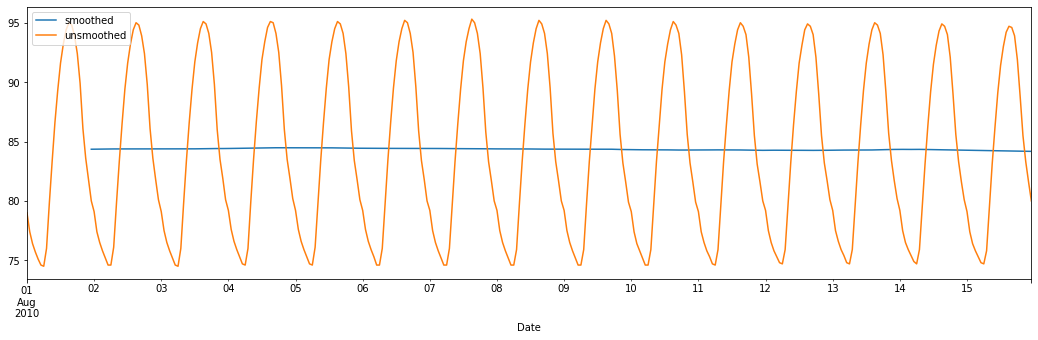

In [72]:
%matplotlib inline
# Plot both smoothed and unsmoothed data using august.plot().
august.plot(figsize=(18, 5));

## 7. Resample and roll with it
As of pandas version 0.18.0, the interface for applying rolling transformations to time series has become more consistent and flexible, and feels somewhat like a groupby (If you do not know what a groupby is, don't worry, you will learn about it in the next course!).

You can now flexibly chain together resampling and rolling operations. In this exercise, the same weather data from the previous exercises has been pre-loaded for you. Your job is to extract one month of data, resample to find the daily high temperatures, and then use a rolling and aggregation operation to smooth the data.

In [89]:
# Extract the August 2010 data: august
august = df['Temperature']['2010-08']
august.tail()

Date
2010-08-31 19:00:00    86.6
2010-08-31 20:00:00    83.4
2010-08-31 21:00:00    81.2
2010-08-31 22:00:00    79.7
2010-08-31 23:00:00    78.2
Name: Temperature, dtype: float64

In [84]:
# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()
daily_highs

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
2010-08-06    95.2
2010-08-07    95.3
2010-08-08    95.2
2010-08-09    95.2
2010-08-10    95.1
2010-08-11    95.0
2010-08-12    94.9
2010-08-13    95.0
2010-08-14    94.9
2010-08-15    94.7
2010-08-16    94.7
2010-08-17    94.8
2010-08-18    94.8
2010-08-19    94.8
2010-08-20    94.8
2010-08-21    94.7
2010-08-22    94.6
2010-08-23    94.5
2010-08-24    94.3
2010-08-25    94.1
2010-08-26    94.0
2010-08-27    93.7
2010-08-28    93.5
2010-08-29    93.3
2010-08-30    93.3
2010-08-31    93.1
Freq: D, Name: Temperature, dtype: float64

In [85]:
# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window = 7).mean()
daily_highs_smoothed

Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64

## 8. Method chaining and filtering
We've seen that pandas supports method chaining. This technique can be very powerful when cleaning and filtering data.

In this exercise, load the DataFrame containing flight departure data for a single airline and a single airport for the month of July 2015. Your job is to use .str() filtering and method chaining to generate summary statistics on flight delays each day to Dallas.

In [136]:
flight = pd.read_csv("datasets/austin_airport_departure_data_2015_july.csv", header= 10, 
                     parse_dates= True, index_col= "Date (MM/DD/YYYY)")
flight.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1741 entries, 2015-07-01 to NaT
Data columns (total 17 columns):
  Carrier Code                            1741 non-null object
Flight Number                             1740 non-null float64
Tail Number                               1740 non-null object
Destination Airport                       1740 non-null object
Scheduled Departure Time                  1740 non-null object
Actual Departure Time                     1740 non-null object
Scheduled Elapsed Time(Minutes)           1740 non-null float64
Actual Elapsed Time(Minutes)              1740 non-null float64
Departure Delay(Minutes)                  1740 non-null float64
Wheels-off Time                           1740 non-null object
Taxi-out Time(Minutes)                    1740 non-null float64
DelayCarrier(Minutes)                     1740 non-null float64
DelayWeather(Minutes)                     1740 non-null float64
DelayNational Aviation System(Minutes)    1740 non-null 

In [137]:
flight.columns

Index(['  Carrier Code', 'Flight Number', 'Tail Number',
       'Destination Airport ', 'Scheduled Departure Time',
       'Actual Departure Time', 'Scheduled Elapsed Time(Minutes)',
       'Actual Elapsed Time(Minutes)', 'Departure Delay(Minutes)',
       'Wheels-off Time', 'Taxi-out Time(Minutes)', 'DelayCarrier(Minutes)',
       'DelayWeather(Minutes)', 'DelayNational Aviation System(Minutes)',
       'DelaySecurity(Minutes)', 'DelayLate Aircraft Arrival(Minutes)',
       'Unnamed: 17'],
      dtype='object')

In [138]:
# Strip extra whitespace from the column names: df.columns
flight.columns = flight.columns.str.strip()
flight.columns

Index(['Carrier Code', 'Flight Number', 'Tail Number', 'Destination Airport',
       'Scheduled Departure Time', 'Actual Departure Time',
       'Scheduled Elapsed Time(Minutes)', 'Actual Elapsed Time(Minutes)',
       'Departure Delay(Minutes)', 'Wheels-off Time', 'Taxi-out Time(Minutes)',
       'DelayCarrier(Minutes)', 'DelayWeather(Minutes)',
       'DelayNational Aviation System(Minutes)', 'DelaySecurity(Minutes)',
       'DelayLate Aircraft Arrival(Minutes)', 'Unnamed: 17'],
      dtype='object')

In [139]:
# Extract data for which the destination airport is Dallas: dallas
dallas = flight['Destination Airport'].str.contains('DAL')
dallas.tail()

Date (MM/DD/YYYY)
2015-07-31    False
2015-07-31    False
2015-07-31    False
2015-07-31     True
NaT             NaN
Name: Destination Airport, dtype: object

In [148]:
# Compute the total number of Dallas departures each day: daily_departures
daily_departures = dallas.resample("D").sum()
daily_departures.tail()

Date (MM/DD/YYYY)
2015-07-27    10
2015-07-28    10
2015-07-29    10
2015-07-30    10
2015-07-31    11
dtype: int64

In [142]:
# Generate the summary statistics for daily Dallas departures: stats
stats = daily_departures.describe()
stats

count    31.000000
mean      9.322581
std       1.989759
min       3.000000
25%       9.500000
50%      10.000000
75%      10.000000
max      11.000000
dtype: float64

Great work! You'll return to this dataset later in this chapter.



## 9. Missing values and interpolation
One common application of interpolation in data analysis is to fill in missing data.

In this exercise, noisy measured data that has some dropped or otherwise missing values has been loaded. The goal is to compare two time series, and then look at summary statistics of the differences. The problem is that one of the data sets is missing data at some of the times. 

Your job is to first interpolate to fill in the data for all days. Then, compute the differences between the two data sets, now that they both have full support for all times. Finally, generate the summary statistics that describe the distribution of differences.

In [241]:
# Chopping the dataframe to emulate missing values
ts5 = ts2.iloc[0: 3, :]

In [243]:
# Reindexing based on ts2 to show how the last entries chopped off are now missing values
ts5.reindex(ts2.index).head()

,Temperature,DewPoint,Pressure
Date,,,
2010-07-04 00:00:00,77.6,70.8,1.0
2010-07-04 01:00:00,76.3,71.1,1.0
2010-07-04 02:00:00,75.5,71.1,1.0
2010-07-04 03:00:00,NaN,NaN,NaN
2010-07-04 04:00:00,NaN,NaN,NaN


In [245]:
# Reset the index of ts5 to ts2, and then use linear interpolation to fill in the NaNs: ts5_interp
ts5_interp = ts5.reindex(ts2.index).interpolate(how="linear")
ts5_interp.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-07-04 00:00:00,77.6,70.8,1.0
2010-07-04 01:00:00,76.3,71.1,1.0
2010-07-04 02:00:00,75.5,71.1,1.0
2010-07-04 03:00:00,75.5,71.1,1.0
2010-07-04 04:00:00,75.5,71.1,1.0


In [247]:
# Import numpy
import numpy as np

# Compute the absolute difference of ts1 and ts5_interp: differences 
differences = np.abs(ts2-ts5_interp)

# Generate and print summary statistics of the differences
differences.describe()

,Temperature,DewPoint,Pressure
count,24.000000,24.000000,24.0
mean,7.233333,0.975000,0.0
std,6.149632,0.951086,0.0
min,0.000000,0.000000,0.0
25%,1.050000,0.000000,0.0
50%,6.300000,0.850000,0.0
75%,13.550000,1.600000,0.0
max,16.100000,2.800000,0.0


## 10. Time zones and conversion
Time zone handling with pandas typically assumes that you are handling the Index of the Series. In this exercise, you will learn how to handle timezones that are associated with datetimes in the column data, and not just the Index.

You will work with the flight departure dataset again, and this time you will select Los Angeles ('LAX') as the destination airport.

Here we will use a mask to ensure that we only compute on data we actually want. To learn more about Boolean masks, click [here](https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html)!

In [262]:
# Build a Boolean mask to filter for the 'LAX' departure flights: mask
mask = flight['Destination Airport'] == "LAX"

# Use the mask to subset the data and reset the index of the flight dataframe: la
la = flight[mask].reset_index()
la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 18 columns):
Date (MM/DD/YYYY)                         62 non-null datetime64[ns]
Carrier Code                              62 non-null object
Flight Number                             62 non-null float64
Tail Number                               62 non-null object
Destination Airport                       62 non-null object
Scheduled Departure Time                  62 non-null object
Actual Departure Time                     62 non-null object
Scheduled Elapsed Time(Minutes)           62 non-null float64
Actual Elapsed Time(Minutes)              62 non-null float64
Departure Delay(Minutes)                  62 non-null float64
Wheels-off Time                           62 non-null object
Taxi-out Time(Minutes)                    62 non-null float64
DelayCarrier(Minutes)                     62 non-null float64
DelayWeather(Minutes)                     62 non-null float64
DelayNational Aviation Syste

In [267]:
# Combine two columns of data to create a datetime series: times_tz_none 
times_tz_none = pd.to_datetime( la['Date (MM/DD/YYYY)'].astype(str) + ' ' + la['Wheels-off Time'] )
times_tz_none.tail()

57   2015-07-29 16:29:00
58   2015-07-30 05:36:00
59   2015-07-30 16:41:00
60   2015-07-31 05:39:00
61   2015-07-31 17:04:00
dtype: datetime64[ns]

In [268]:
# Localize the time to US/Central: times_tz_central
times_tz_central = times_tz_none.dt.tz_localize("US/CENTRAL")
times_tz_central.tail()

57   2015-07-29 16:29:00-05:00
58   2015-07-30 05:36:00-05:00
59   2015-07-30 16:41:00-05:00
60   2015-07-31 05:39:00-05:00
61   2015-07-31 17:04:00-05:00
dtype: datetime64[ns, US/Central]

In [269]:
# Convert the datetimes from US/Central to US/Pacific
times_tz_pacific = times_tz_central.dt.tz_convert("US/PACIFIC")
times_tz_pacific.tail()

57   2015-07-29 14:29:00-07:00
58   2015-07-30 03:36:00-07:00
59   2015-07-30 14:41:00-07:00
60   2015-07-31 03:39:00-07:00
61   2015-07-31 15:04:00-07:00
dtype: datetime64[ns, US/Pacific]

## 11. Plotting time series, datetime indexing
Pandas handles datetimes not only in your data, but also in your plotting.

In this exercise, some time series data has been pre-loaded. However, we have not parsed the date-like columns nor set the index, as we have done for you in the past!

The plot displayed is how pandas renders data with the default integer/positional index. Your job is to convert the 'Date' column from a collection of strings into a collection of datetime objects. Then, you will use this converted 'Date' column as your new index, and re-plot the data, noting the improved datetime awareness. After you are done, you can cycle between the two plots you generated by clicking on the 'Previous Plot' and 'Next Plot' buttons.

Before proceeding, look at the plot shown and observe how pandas handles data with the default integer index. 

In [272]:
weather = pd.read_csv("datasets/weather_data_austin_2010.csv")
weather.tail()

,Temperature,DewPoint,Pressure,Date
8754,51.1,38.1,1.0,20101231 19:00
8755,49.0,37.9,1.0,20101231 20:00
8756,47.9,37.9,1.0,20101231 21:00
8757,46.9,37.9,1.0,20101231 22:00
8758,46.2,37.7,1.0,20101231 23:00


In [280]:
df = weather.loc[0:750, ["Temperature", "Date"]]
df.tail()

,Temperature,Date
746,46.1,20100201 02:00
747,45.5,20100201 03:00
748,44.9,20100201 04:00
749,44.4,20100201 05:00
750,44.7,20100201 06:00


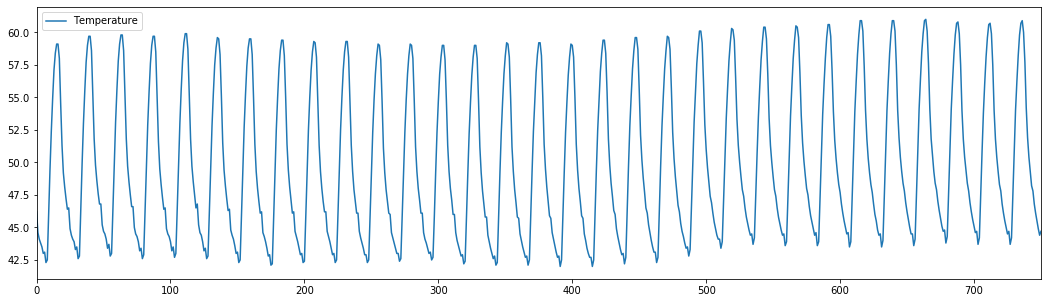

In [281]:
# Plot the raw data before setting the datetime index
df.plot(figsize=(18, 5));

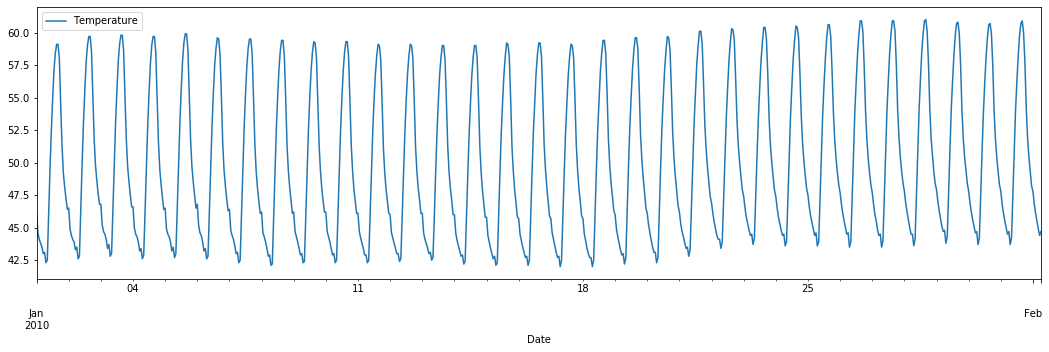

In [282]:
# Convert the 'Date' column into a collection of datetime objects: df.Date
df.Date = pd.to_datetime(df.Date)

# Set the index to be the converted 'Date' column
df.set_index("Date", inplace=True)

# Re-plot the DataFrame to see that the axis is now datetime aware!
df.plot(figsize=(18, 5));

## 12. Plotting date ranges, partial indexing
Now that you have set the DatetimeIndex in your DataFrame, you have a much more powerful and flexible set of tools to use when plotting your time series data. Of these, one of the most convenient is partial string indexing and slicing. In this exercise, we've pre-loaded a full year of Austin 2010 weather data, with the index set to be the datetime parsed 'Date' column as shown in the previous exercise.

Your job is to use partial string indexing of the dates, in a variety of datetime string formats, to plot all the summer data and just one week of data together. 

First, remind yourself how to extract one month of temperature data using 'May 2010' as a key into df.Temperature[], and call head() to inspect the result: df.Temperature['May 2010'].head().

In [286]:
df = pd.read_csv("datasets/weather_data_austin_2010.csv", parse_dates = True, index_col = "Date")

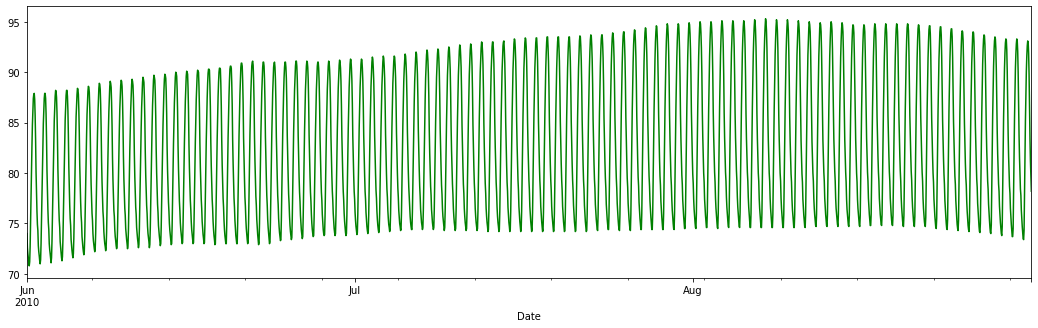

In [307]:
# Plot the summer data
df.Temperature['2010-Jun':'2010-Aug'].plot(figsize=(18, 5),style="g-");

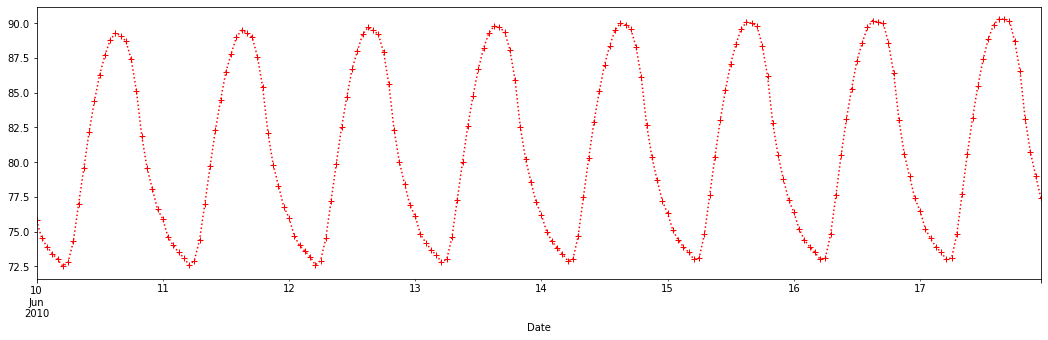

In [335]:
# Plot the one week data
df.Temperature['2010-06-10':'2010-06-17'].plot(figsize=(18, 5), style="r+:")

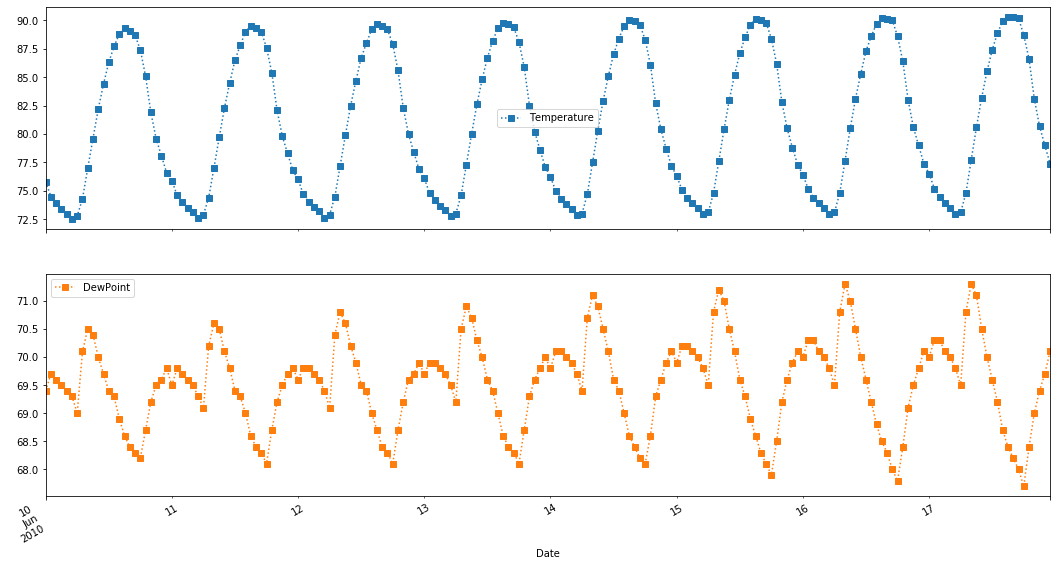

In [334]:
# Plotting one week of temperature and pressure Dewpoint in one diagram with custom styles
df[["Temperature", "DewPoint"]]['2010-06-10':'2010-06-17'].plot(figsize=(18, 10), style=":s" , subplots= True);